In [159]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV


In [160]:
#reading data files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#storing them in an array to modify them both


In [161]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

c:\program files (x86)\python 3.7.0\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [162]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [163]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
data = [train, test]

In [164]:
#checking for null values
for i in data:
    print(i.loc[:, :].isnull().sum())
    print("\n")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64




C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


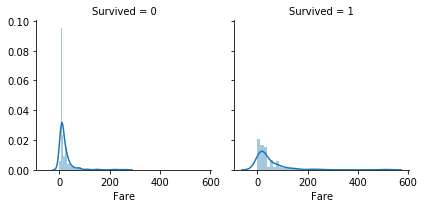

In [165]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, "Fare")

In [166]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [167]:
#checking for null values
for i in data:
    print(i.loc[:, :].isnull().sum())
    print("\n")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64




C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


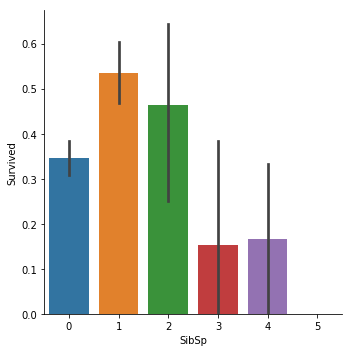

In [168]:
sns.factorplot(data = train, x ="SibSp", y="Survived", kind = "bar")

In [169]:
#catagorizing class into bins
for d in data:
    for i in range(1, 4):
        d[f"Class_{i}"]=0
        d.loc[d["Pclass"]==i, f'Class_{i}']=1
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


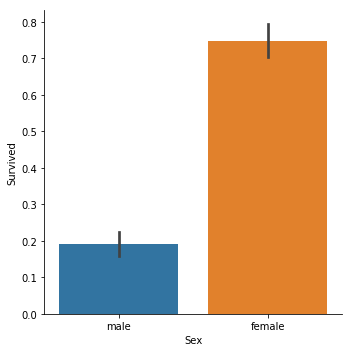

In [170]:
sns.factorplot(data = train, x ="Sex", y="Survived", kind = "bar")

In [171]:
#encoding Sex

for d in data:
    for i in train["Sex"].unique():
        d[f"Sex_{i}"]=0
        d.loc[d["Sex"]==i, f'Sex_{i}']=1
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3,Sex_male,Sex_female
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1


In [172]:
# encoding family size into alone, mid and large
for d in data:
    d["Family"] = train["SibSp"] + train["Parch"] + 1
    d["Family_Alone"] = 0
    d.loc[d["Family"]==1, "Family_Alone"] = 1
    d["Family_Mid"] = 0
    d.loc[(d["Family"]>=2)&(d["Family"]<=4), "Family_Mid"] = 1
    d["Family_Large"] = 0
    d.loc[d["Family"]>=5, "Family_Large"] = 1

test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3,Sex_male,Sex_female,Family,Family_Alone,Family_Mid,Family_Large
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,1,0,2,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1,2,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,1,0,2,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1,1,1,0,0


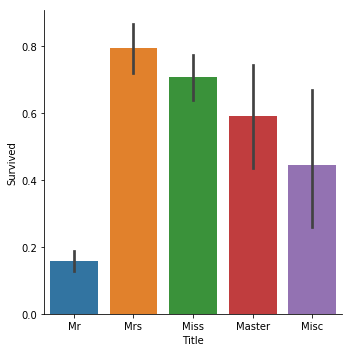

In [173]:
#getting the tiles from the name
stat_min = 10
for dataset in data:
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    title_names = (dataset['Title'].value_counts() < stat_min)
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
sns.factorplot(data= train, x = "Title", y= "Survived", kind= "bar")

In [174]:
#binnning the titles
for d in data:
    for i in train["Title"].unique():
        d[f"Title_{i}"]=0
        d.loc[d["Title"]==i, f'Title_{i}']=1


In [175]:
train.loc[train["Embarked"].isna(), "Embarked"]= train["Embarked"].mode()[0]
for d in data:
    for i in train["Embarked"].unique():
        d[f"Embarked_{i}"]=0
        d.loc[d["Embarked"]==i, f'Embarked_{i}']=1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Large,Title,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Misc,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,Mr,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,Mrs,0,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,Miss,0,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,Mrs,0,1,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,Mr,1,0,0,0,0,1,0,0


In [176]:
#filling the null values in age and embarked
titles = []
for i in train["Title"].unique():
    titles.append(f'Title_{i}')
for d in data:
    for i in range(1, 4):
        for t in titles:
            d.loc[(d["Pclass"]==i)&(d["Age"].isnull())&d[t]==1, "Age"] = train.loc[(train["Pclass"]==i)&(d[t]==1), "Age"].mean()
        
test.loc[test["Fare"].isna(), "Fare"] = train["Fare"].mode()[0]


In [177]:
for dataset in data:
    # Replace the Cabin number by the type of cabin 'X' if not
    dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])


In [178]:
for i in data:
    print(i.loc[:, total_features].isnull().sum())
    print("\n")

Pclass            0
Age               0
Family            0
SibSp             0
Parch             0
Fare              0
Family_Alone      0
Family_Mid        0
Family_Large      0
Class_3           0
Class_1           0
Class_2           0
Title_Mr          0
Title_Mrs         0
Title_Miss        0
Title_Master      0
Title_Misc        0
Sex_male          0
Sex_female        0
Age_1           881
Age_2           881
Age_3           881
Fare_1          881
Fare_2          881
Fare_3          881
dtype: int64


Pclass            0
Age               0
Family            0
SibSp             0
Parch             0
Fare              0
Family_Alone      0
Family_Mid        0
Family_Large      0
Class_3           0
Class_1           0
Class_2           0
Title_Mr          0
Title_Mrs         0
Title_Miss        0
Title_Master      0
Title_Misc        0
Sex_male          0
Sex_female        0
Age_1           418
Age_2           418
Age_3           418
Fare_1          418
Fare_2          418
Fare_

C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [179]:
# binning the cabins

train["Cabin"].unique()
for d in data:
    for i in train["Cabin"].unique():
        d[f"Cabin_{i}"] = 0
        d.loc[d["Cabin"]==i, f"Cabin_{i}"] = 1

In [180]:
# adding a child column
for d in data:
    d["Age_1"] = 0
    d.loc[d["Age"]<=16,"Age_1"] = 1
for d in data:
    d["Age_2"] = 0
    d.loc[(d["Age"]<=50)&(d["Age"]>16),"Age_2"] = 1
for d in data:
    d["Age_3"] = 0
    d.loc[d["Age"]>50,"Age_3"] = 1


In [181]:
train.loc[:, "Fare"].describe()
for d in data:
    d["Fare_1"] = 0
    d.loc[d["Fare"]<=15,"Fare_1"] = 1
for d in data:
    d["Fare_2"] = 0
    d.loc[(d["Fare"]<=30)&(d["Fare"]>15),"Fare_2"] = 1
for d in data:
    d["Fare_3"] = 0
    d.loc[d["Fare"]>30,"Fare_3"] = 1

In [182]:
# train.loc[:, ["Ticket", "Survived"]].groupby(["Ticket"]).mean()
#r"\D" in train["Ticket"]
# train["Ticket"].str.contains(r'\D')
for d in data:
    d["Letter"] = 0
    d.loc[d["Ticket"].str.contains(r'\D'), "Letter"] = 1
# train.loc[:, ["Letter", "Survived", "Cabin"]].groupby(["Letter", "Cabin"]).mean()
# train.loc[30:100, ["Ticket", "Survived" , "Cabin"]]

In [183]:
for d in data:
    d["NameLength"] = d["Name"].apply(lambda x: len(x))
    for i in range(1, 5):
        d[f"NameLength_{i}"] = 0
    d.loc[(d["NameLength"]<train["NameLength"].quantile(0.25)), "NameLength_1"] = 1
    d.loc[(d["NameLength"]<train["NameLength"].quantile(0.5))&(d["NameLength"]>=train["NameLength"].quantile(0.25)), "NameLength_2"] = 1
    d.loc[(d["NameLength"]<train["NameLength"].quantile(0.75))&(d["NameLength"]>=train["NameLength"].quantile(0.5)), "NameLength_3"] = 1
    d.loc[(d["NameLength"]>=train["NameLength"].quantile(0.75)), "NameLength_4"] = 1
# train.loc[:, ["NameLength", "Survived"]].groupby(["NameLength"]).mean()
# train.loc[:, ["Age", "Age_1", "Age_2", "Age_3"]]


In [184]:
# the features that will be use to classify
total_features = ["Pclass","Age","Family","Fare","Family_Alone", "Family_Mid", "Family_Large"]
for i in train["Pclass"].unique():
    total_features.append(f'Class_{i}')
# for i in train["Embarked"].unique():
#     total_features.append(f'Embarked_{i}')
for i in train["Title"].unique():
    total_features.append(f'Title_{i}')
for i in train["Sex"].unique():
    total_features.append(f'Sex_{i}')
for i in [1, 2, 3]:
    total_features.append(f'Age_{i}')
for i in [1, 2, 3]:
    total_features.append(f'Fare_{i}')
# for i in train["Cabin"].unique():
#     total_features.append(f"Cabin_{i}")
# for i in range(1, 5):
#     total_features.append(f"NameLength_{i}")
total_features

['Pclass',
 'Age',
 'Family',
 'Fare',
 'Family_Alone',
 'Family_Mid',
 'Family_Large',
 'Class_3',
 'Class_1',
 'Class_2',
 'Title_Mr',
 'Title_Mrs',
 'Title_Miss',
 'Title_Master',
 'Title_Misc',
 'Sex_male',
 'Sex_female',
 'Age_1',
 'Age_2',
 'Age_3',
 'Fare_1',
 'Fare_2',
 'Fare_3']

In [185]:
#spliting data for training and testing
X = train.loc[:, total_features]
Y = train.loc[:, "Survived"]
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state= 1000)

In [186]:
#using the gridsearch to find the best fit for the random forest classifier and storing it in prime
param = {"n_estimators": np.arange(10, 210, 10), "max_depth": np.arange(3, 6)}
clf = RandomForestClassifier(random_state=0)
RNprime = GridSearchCV(clf, param, "accuracy", cv=5).fit(xTrain, yTrain)
# RNprime.cv_results_

C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [187]:
print(f'Randomforest best cv score: {RNprime.best_score_}')
print(f'Randomforest test score: {RNprime.score(xTest, yTest)}')
print(f'Randomforest trainning score: {RNprime.score(xTrain, yTrain)}')

Randomforest best cv score: 0.8272727272727273
Randomforest test score: 0.8597285067873304
Randomforest trainning score: 0.8393939393939394


In [190]:
#testing the gradient boosted tree classifier and storing it in prime
param = {"n_estimators": np.arange(10, 210, 10), "max_depth": np.arange(2, 6), "learning_rate": np.logspace(-4, 1, 5)}
clf = GradientBoostingClassifier(random_state=0)
GBprime = GridSearchCV(clf, param, "accuracy", cv=5).fit(xTrain, yTrain)


C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [191]:
print(f"gradient boosted best cv score: {GBprime.best_score_}")
print(f"gradient boosted test score: {GBprime.score(xTest, yTest)}")
print(f'gradient boosted trainning score: {GBprime.score(xTrain, yTrain)}')

gradient boosted best cv score: 0.8242424242424242
gradient boosted test score: 0.8552036199095022
gradient boosted trainning score: 0.8681818181818182


In [192]:
#testing the ada boosted tree classifier and storing it in prime
param = {"n_estimators": np.arange(10, 210, 10), "learning_rate": np.logspace(-4, 1, 5)}
clf = AdaBoostClassifier(random_state=0)
ADprime = GridSearchCV(clf, param, "accuracy", cv=5).fit(xTrain, yTrain)

C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [193]:
print(f"ada boosted best fit score: {ADprime.best_score_}")
print(f"ada boosted test score: {ADprime.score(xTest, yTest)}")
print(f'ada boosted trainning score: {ADprime.score(xTrain, yTrain)}')

ada boosted best fit score: 0.8121212121212121
ada boosted test score: 0.8506787330316742
ada boosted trainning score: 0.8242424242424242


In [194]:
param = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "C": np.logspace(-4, 1, 5), 'max_iter': [10000]}
clf = LogisticRegression(random_state=0, penalty= "l2")
LGclf = GridSearchCV(clf, param, "accuracy", cv=5).fit(xTrain, yTrain)
# LGclf = LogisticRegression(C = 0.7, solver = "liblinear", max_iter = 1000, penalty = "l1").fit(xTrain, yTrain)


C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [195]:
print(f"Logistic Regression best cv score: {LGclf.best_score_}")
print(f"Logistic Regression test score: {LGclf.score(xTest, yTest)}")
print(f'Logistic Regression trainning score: {LGclf.score(xTrain, yTrain)}')

Logistic Regression best cv score: 0.8181818181818182
Logistic Regression test score: 0.8506787330316742
Logistic Regression trainning score: 0.8227272727272728


In [196]:
param = {"n_neighbors": np.arange(1, 50), "leaf_size": np.arange(1, 50)}
clf = KNeighborsClassifier()
KNclf = GridSearchCV(clf, param, "accuracy", cv=5).fit(xTrain, yTrain)

C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [197]:
print(f"K nearest best cv score: {KNclf.best_score_}")
print(f"K nearest test score: {KNclf.score(xTest, yTest)}")
print(f'K nearest trainning score: {KNclf.score(xTrain, yTrain)}')

K nearest best cv score: 0.7227272727272728
K nearest test score: 0.751131221719457
K nearest trainning score: 0.7378787878787879


In [198]:
ptest = pd.DataFrame(yTest.copy())
ptest.reset_index(inplace = True)
ptest["Randomforest"] = pd.DataFrame(RNprime.predict(xTest))
ptest["Gradient"] = pd.DataFrame(GBprime.predict(xTest))
ptest["Ada"] = pd.DataFrame(ADprime.predict(xTest))
ptest["Logistic"] = pd.DataFrame(LGclf.predict(xTest))
ptest["Knearest"] = pd.DataFrame(KNclf.predict(xTest))
# ptest["Mode"] = ptest.loc[:, ["Randomforest","Gradient", "Ada", "Logistic"]].mode(axis=1)
clf_set = ["Ada", "Logistic", "Knearest"]
ptest["Mode"] = ptest.loc[:, clf_set].mode(axis=1)
len(ptest.loc[ptest["Survived"]==ptest["Mode"]])/len(ptest)


0.8506787330316742

In [199]:
best_scores = [RNprime.best_score_,GBprime.best_score_, ADprime.best_score_, LGclf.best_score_, KNclf.best_score_]
test_scores = [RNprime.score(xTest, yTest), GBprime.score(xTest, yTest), ADprime.score(xTest, yTest), LGclf.score(xTest, yTest), KNclf.score(xTest, yTest)]
train_scores = [RNprime.score(xTrain, yTrain), GBprime.score(xTrain, yTrain), ADprime.score(xTrain, yTrain), LGclf.score(xTrain, yTrain), KNclf.score(xTrain, yTrain)]
SC = pd.DataFrame([best_scores, test_scores, train_scores], columns = ["Random Forest","Gradient Boosted", "Ada Boost", "Logistic", "KNearest"], index = ["Best CV Score", "Test score", "Train score"])
SC

,Random Forest,Gradient Boosted,Ada Boost,Logistic,KNearest
Best CV Score,0.827273,0.824242,0.812121,0.818182,0.722727
Test score,0.859729,0.855204,0.850679,0.850679,0.751131
Train score,0.839394,0.868182,0.824242,0.822727,0.737879


AxesSubplot(0.125,0.125;0.775x0.755)


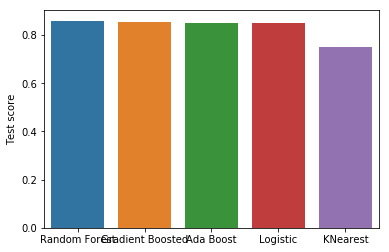

In [200]:
# sns.barplot(y = SC.loc["Best CV Score", :], x = SC.columns)
ax = sns.barplot(y = SC.loc["Test score", :], x = SC.columns)
print(ax)

In [201]:
ptest.loc[:, ["Randomforest", "Gradient", "Ada", "Logistic", "Knearest"]].corr()

,Randomforest,Gradient,Ada,Logistic,Knearest
Randomforest,1.000000,0.949962,0.921034,0.906597,0.438615
Gradient,0.949962,1.000000,0.872242,0.861233,0.441164
Ada,0.921034,0.872242,1.000000,0.865845,0.465174
Logistic,0.906597,0.861233,0.865845,1.000000,0.534556
Knearest,0.438615,0.441164,0.465174,0.534556,1.000000


In [202]:
X_ = test.loc[:, total_features]
# Y_ = prime.predict(X_)

In [203]:
#putting the results in submission.csv
result= pd.DataFrame(test["PassengerId"].copy(), columns = ['PassengerId'])
# Y_ = pd.DataFrame(RNprime.predict(X_),GBprime.predict(X_), LGclf.predict(X_),  columns = ["Randomforest", "gradient", "Logistic"])
result["Randomforest"] = pd.DataFrame(RNprime.predict(X_))
result["Gradient"] = pd.DataFrame(GBprime.predict(X_))
result["Ada"] = pd.DataFrame(ADprime.predict(X_))
result["Logistic"] = pd.DataFrame(LGclf.predict(X_))
result["Knearest"] = pd.DataFrame(KNclf.predict(X_))
result["Survived"] = result.loc[:, clf_set].mode(axis=1)
result.head()
# Y_.head()
# result["Survived"] = pd.DataFrame(RNprime.predict(X_))
result.loc[:, ["PassengerId", "Survived"]].to_csv("submission_2.csv", index = False)